In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
def calculate_class_weights(labels):
    """
    Calculate class weights for imbalanced datasets.
    Args:
        labels (np.array or list): The class labels in the dataset.
    Returns:
        dict: A dictionary mapping each class to its weight.
    """
    classes = np.unique(labels)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
    return dict(zip(classes, weights))

In [3]:
def apply_bsmote_with_limit(X, y, scaling_factor=5000, max_class_limit_ratio=0.5):
    """
    Apply BorderlineSMOTE with a limit on how much minority classes can be upsampled.

    Args:
        X (pd.DataFrame): Features of the dataset.
        y (pd.Series): Labels of the dataset.
        scaling_factor (int): Maximum upscaling factor for minority classes relative to their original size.
        max_class_limit_ratio (float): Maximum oversampling limit as a fraction of the largest class size.

    Returns:
        tuple: Resampled X and y.
    """

    # Convert y to a pandas Series for easier manipulation
    y = pd.Series(y)
    
    # Dynamically determine n_neighbors based on smallest class
    class_counts = Counter(y)
    min_class_size = min(class_counts.values())
    largest_class_size = max(class_counts.values())
    n_neighbors = min(5, min_class_size - 1)  # Adjust neighbors to fit smallest class
    j_neighbors = min(10, min_class_size - 1)

    # Calculate target sizes for minority classes
    smote_target_sizes = {
        class_label: min(
            scaling_factor * original_size,
            int(largest_class_size * max_class_limit_ratio)
        )
        for class_label, original_size in class_counts.items()
    }

    # Adjust BorderlineSMOTE strategy to limit the oversampling
    smote_strategy = {
        class_label: target_size
        for class_label, target_size in smote_target_sizes.items()
        if target_size > class_counts[class_label]
    }

    # Apply BorderlineSMOTE with the limited strategy
    smote = BorderlineSMOTE(sampling_strategy=smote_strategy, random_state=42, k_neighbors=n_neighbors, m_neighbors=10, kind='borderline-2')
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled)

# Shuttle

In [4]:
# Load the training dataset (replace with your dataset path)
dataset_path = "/kaggle/input/ma-datasets/shuttle_train.csv"  # Example for KDD dataset
data = pd.read_csv(dataset_path)

# Assume the last column is the target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Print original class distribution
print("Original Class Distribution:")
print(y.value_counts())

Original Class Distribution:
label
1    36469
4     7122
5     2614
3      137
2       40
7       10
6        8
Name: count, dtype: int64



Resampled Class Distribution:
label
1    36469
5    18234
4    18234
3    18234
2    18234
6    18234
7    18234
Name: count, dtype: int64


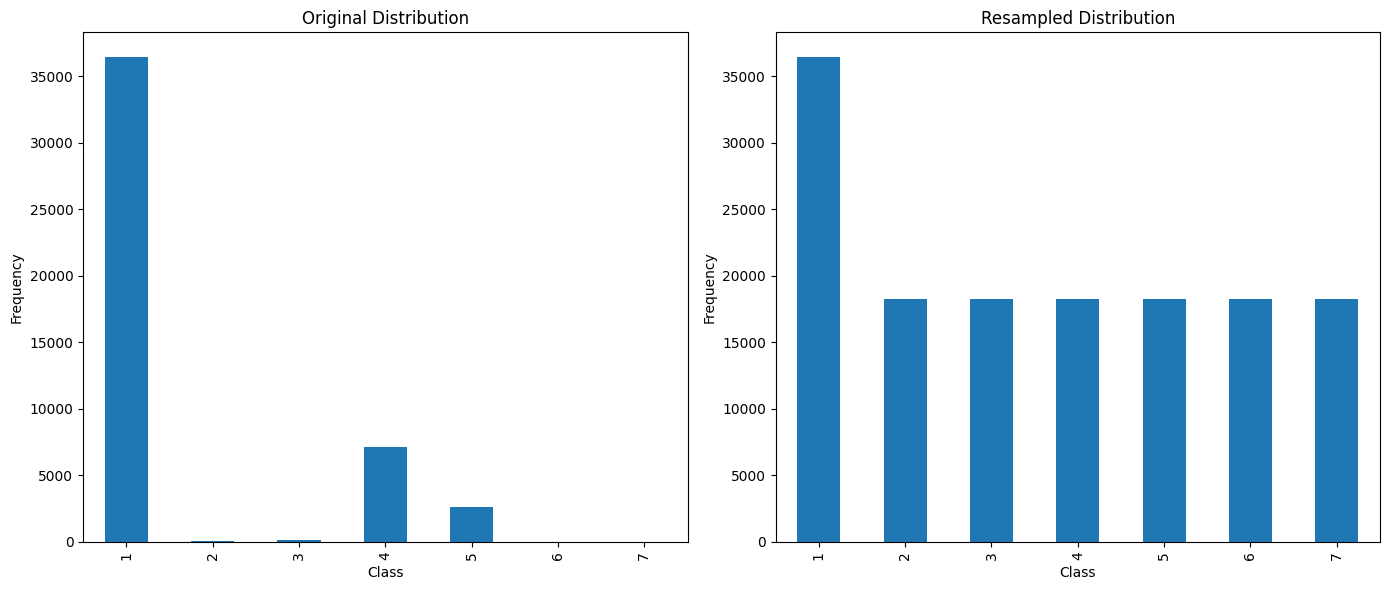


Class Weights (After Resampling):
{1: 0.5714168197647317, 2: 1.1428649775145332, 3: 1.1428649775145332, 4: 1.1428649775145332, 5: 1.1428649775145332, 6: 1.1428649775145332, 7: 1.1428649775145332}


In [5]:
# Rebalance with SMOTE
X_resampled, y_resampled = apply_bsmote_with_limit(X, y)

# Print resampled class distribution
print("\nResampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())

# Visualize original and resampled distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y.value_counts().sort_index().plot(kind='bar', ax=ax[0], title="Original Distribution")
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar', ax=ax[1], title="Resampled Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optionally calculate class weights
class_weights = calculate_class_weights(y_resampled)
print("\nClass Weights (After Resampling):")
print(class_weights)

In [6]:
# Combine resampled features and labels into a single DataFrame
resampled_data = pd.concat([X_resampled, y_resampled.rename('label')], axis=1)

# Save the resampled data to a CSV file
resampled_data.to_csv("shuttle_bsmote.csv", index=False)

print("Resampled data has been saved to 'shuttle_bsmote.csv'")

Resampled data has been saved to 'shuttle_bsmote.csv'


# Covertype

In [7]:
# Load the training dataset (replace with your dataset path)
dataset_path = "/kaggle/input/ma-datasets/covtype_train.csv"  # Example for KDD dataset
data = pd.read_csv(dataset_path)

# Assume the last column is the target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Print original class distribution
print("Original Class Distribution:")
print(y.value_counts())

Original Class Distribution:
label
2    226640
1    169472
3     28603
7     16408
6     13894
5      7594
4      2198
Name: count, dtype: int64



Resampled Class Distribution:
label
2    226640
1    169472
7    113320
5    113320
3    113320
4    113320
6    113320
Name: count, dtype: int64


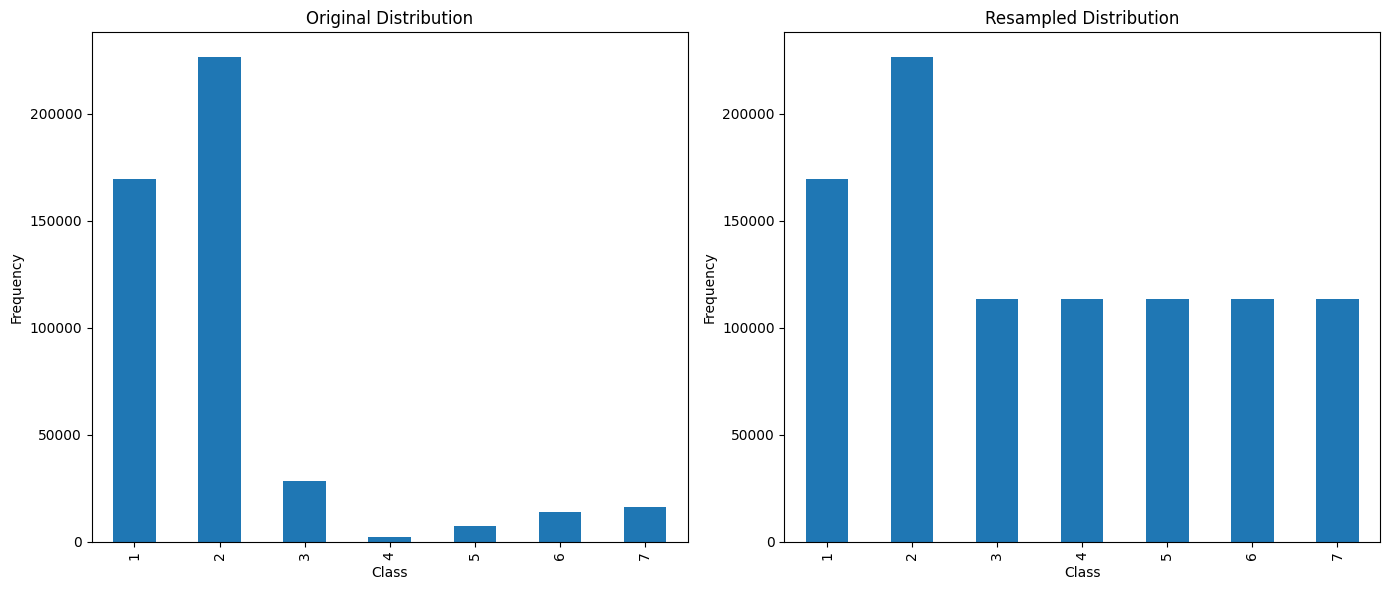


Class Weights (After Resampling):
{1: 0.8115221730686232, 2: 0.6068226514043669, 3: 1.2136453028087337, 4: 1.2136453028087337, 5: 1.2136453028087337, 6: 1.2136453028087337, 7: 1.2136453028087337}


In [8]:
# Rebalance with SMOTE
X_resampled, y_resampled = apply_bsmote_with_limit(X, y)

# Print resampled class distribution
print("\nResampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())

# Visualize original and resampled distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y.value_counts().sort_index().plot(kind='bar', ax=ax[0], title="Original Distribution")
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar', ax=ax[1], title="Resampled Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optionally calculate class weights
class_weights = calculate_class_weights(y_resampled)
print("\nClass Weights (After Resampling):")
print(class_weights)

In [9]:
# Combine resampled features and labels into a single DataFrame
resampled_data = pd.concat([X_resampled, y_resampled.rename('label')], axis=1)

# Save the resampled data to a CSV file
resampled_data.to_csv("covtype_bsmote.csv", index=False)

print("Resampled data has been saved to 'covtype_bsmote.csv'")

Resampled data has been saved to 'covtype_bsmote.csv'


# KDD

In [10]:
# Load the training dataset (replace with your dataset path)
dataset_path = "/kaggle/input/ma-datasets/kdd_train.csv"  # Example for KDD dataset
data = pd.read_csv(dataset_path)

# Assume the last column is the target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Print original class distribution
print("Original Class Distribution:")
print(y.value_counts())

Original Class Distribution:
label
normal.             778224
satan.               12714
ipsweep.              9985
portsweep.            8330
nmap.                 1853
back.                 1762
warezclient.           816
teardrop.              783
pod.                   211
guess_passwd.           42
buffer_overflow.        24
land.                   17
warezmaster.            16
imap.                   10
rootkit.                 8
loadmodule.              7
multihop.                6
ftp_write.               6
phf.                     2
perl.                    2
spy.                     2
Name: count, dtype: int64



Resampled Class Distribution:
label
normal.             778224
portsweep.          389112
pod.                389112
ipsweep.            389112
nmap.               389112
back.               389112
teardrop.           389112
warezclient.        389112
satan.              389112
buffer_overflow.    120000
land.                85000
warezmaster.         80000
imap.                50000
rootkit.             40000
loadmodule.          35000
multihop.            30000
ftp_write.           30000
phf.                 10000
perl.                10000
guess_passwd.           42
spy.                     2
Name: count, dtype: int64


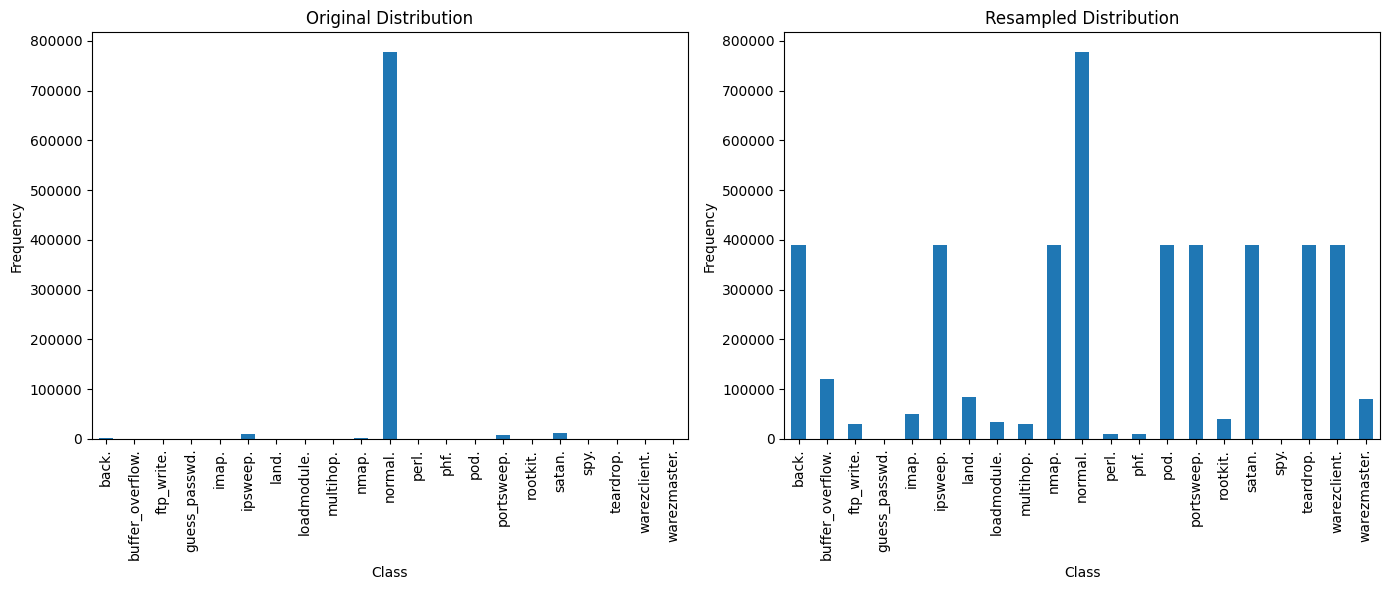


Class Weights (After Resampling):
{'back.': 0.5361614577367368, 'buffer_overflow.': 1.738557142857143, 'ftp_write.': 6.954228571428572, 'guess_passwd.': 4967.306122448979, 'imap.': 4.172537142857143, 'ipsweep.': 0.5361614577367368, 'land.': 2.4544336134453784, 'loadmodule.': 5.960767346938775, 'multihop.': 6.954228571428572, 'nmap.': 0.5361614577367368, 'normal.': 0.2680807288683684, 'perl.': 20.862685714285714, 'phf.': 20.862685714285714, 'pod.': 0.5361614577367368, 'portsweep.': 0.5361614577367368, 'rootkit.': 5.2156714285714285, 'satan.': 0.5361614577367368, 'spy.': 104313.42857142857, 'teardrop.': 0.5361614577367368, 'warezclient.': 0.5361614577367368, 'warezmaster.': 2.6078357142857143}


In [11]:
# Rebalance with SMOTE
X_resampled, y_resampled = apply_bsmote_with_limit(X, y)

# Print resampled class distribution
print("\nResampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())

# Visualize original and resampled distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y.value_counts().sort_index().plot(kind='bar', ax=ax[0], title="Original Distribution")
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar', ax=ax[1], title="Resampled Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optionally calculate class weights
class_weights = calculate_class_weights(y_resampled)
print("\nClass Weights (After Resampling):")
print(class_weights)

In [12]:
# Combine resampled features and labels into a single DataFrame
resampled_data = pd.concat([X_resampled, y_resampled.rename('label')], axis=1)

# Save the resampled data to a CSV file
resampled_data.to_csv("kdd_bsmote.csv", index=False)

print("Resampled data has been saved to 'kdd_bsmote.csv'")

Resampled data has been saved to 'kdd_bsmote.csv'


# Darknet

In [13]:
# Load the training dataset (replace with your dataset path)
dataset_path = "/kaggle/input/ma-datasets/darknet_train.csv"  # Example for KDD dataset
data = pd.read_csv(dataset_path)

# Assume the last column is the target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Print original class distribution
print("Original Class Distribution:")
print(y.value_counts())

Original Class Distribution:
label
Normal                     107443
Darknet_Audio-Streaming     10627
Darknet_Chat                 3633
Darknet_File-Transfer        2088
Darknet_VOIP                 1172
Darknet_Video-Streaming      1077
Darknet_Email                 466
Darknet_Browsing              210
Darknet_P2P                   176
Name: count, dtype: int64



Resampled Class Distribution:
label
Normal                     107443
Darknet_Audio-Streaming     53721
Darknet_Chat                53721
Darknet_Browsing            53721
Darknet_Video-Streaming     53721
Darknet_File-Transfer       53721
Darknet_Email               53721
Darknet_VOIP                53721
Darknet_P2P                 53721
Name: count, dtype: int64


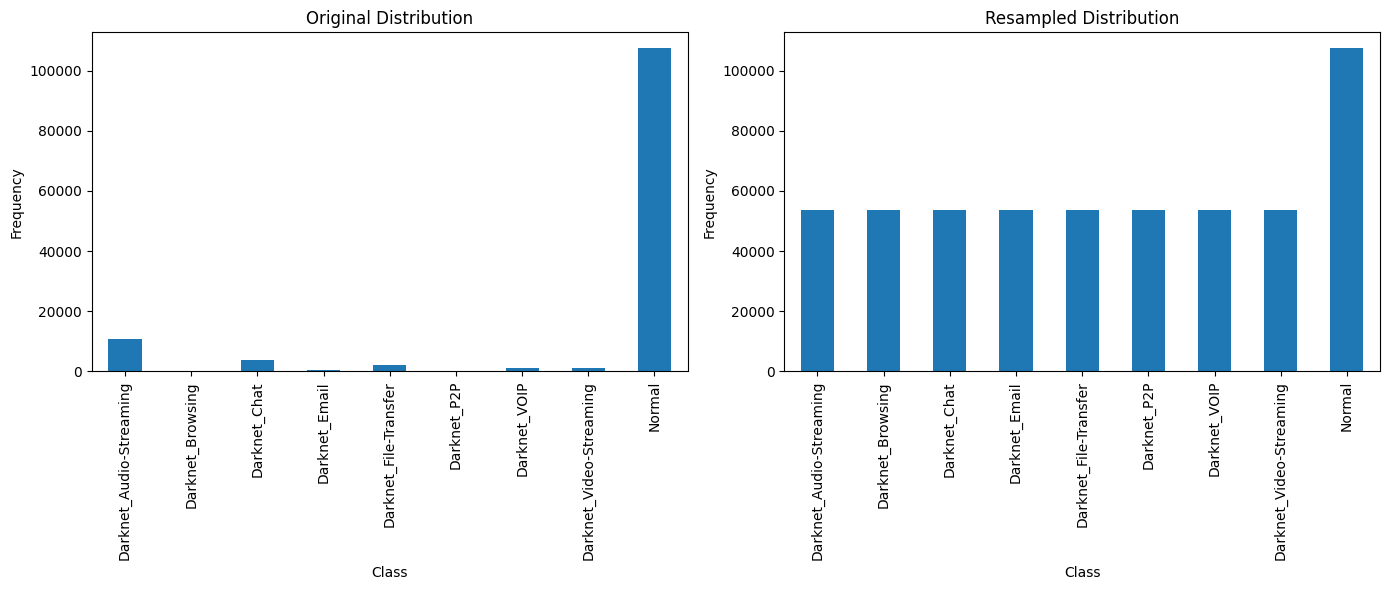


Class Weights (After Resampling):
{'Darknet_Audio-Streaming': 1.1111131794104934, 'Darknet_Browsing': 1.1111131794104934, 'Darknet_Chat': 1.1111131794104934, 'Darknet_Email': 1.1111131794104934, 'Darknet_File-Transfer': 1.1111131794104934, 'Darknet_P2P': 1.1111131794104934, 'Darknet_VOIP': 1.1111131794104934, 'Darknet_Video-Streaming': 1.1111131794104934, 'Normal': 0.5555514189952916}


In [14]:
# Rebalance with SMOTE
X_resampled, y_resampled = apply_bsmote_with_limit(X, y)

# Print resampled class distribution
print("\nResampled Class Distribution:")
print(pd.Series(y_resampled).value_counts())

# Visualize original and resampled distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
y.value_counts().sort_index().plot(kind='bar', ax=ax[0], title="Original Distribution")
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar', ax=ax[1], title="Resampled Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optionally calculate class weights
class_weights = calculate_class_weights(y_resampled)
print("\nClass Weights (After Resampling):")
print(class_weights)

In [15]:
# Combine resampled features and labels into a single DataFrame
resampled_data = pd.concat([X_resampled, y_resampled.rename('label')], axis=1)

# Save the resampled data to a CSV file
resampled_data.to_csv("darknet_bsmote.csv", index=False)

print("Resampled data has been saved to 'darknet_bsmote.csv'")

Resampled data has been saved to 'darknet_bsmote.csv'
